In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import yellowbrick
import warnings

from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
set_palette('dark')
plt.rcParams['figure.dpi'] = 100

In [2]:
data = pd.read_csv('/content/drive/MyDrive/DIGICHROME/iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape

(150, 5)

We can see that the dataframe contains 5 columns and 150 rows.

In [4]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


In [9]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [10]:
data.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [11]:
data = data.drop_duplicates(subset="species")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


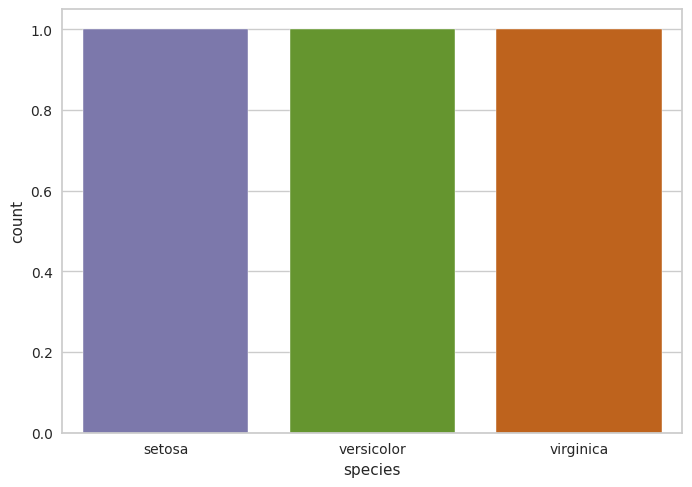

In [12]:
sns.countplot(x='species', data=data, )
plt.show()

**Relation between variables**

We will see the relationship between the sepal length and sepal width and also between petal length and petal width.

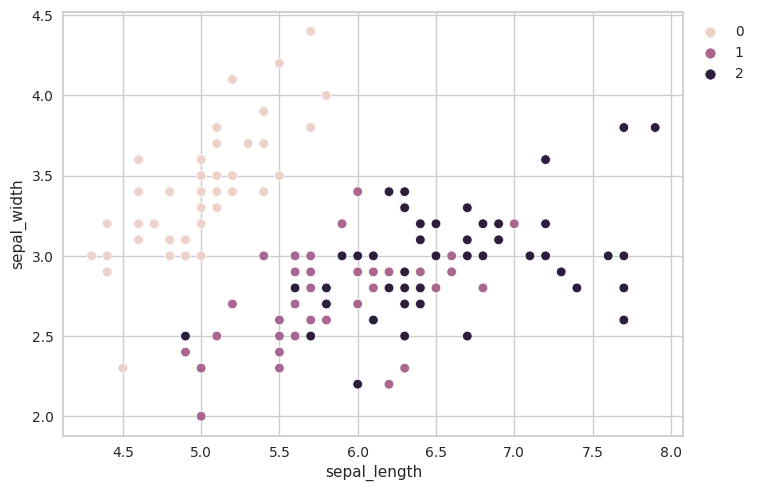

In [37]:
# importing packages
import seaborn as sns
import matplotlib.pyplot as plt


sns.scatterplot(x='sepal_length', y='sepal_width',
				hue='species', data=data, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()


From the above plot, we can infer that –

* Species Setosa has smaller sepal lengths but larger sepal widths.
* Versicolor Species lies in the middle of the other two species in terms of sepal length and width.
* Species Virginica has larger sepal lengths but smaller sepal widths.

**Comparing Petal Length and Petal Width**

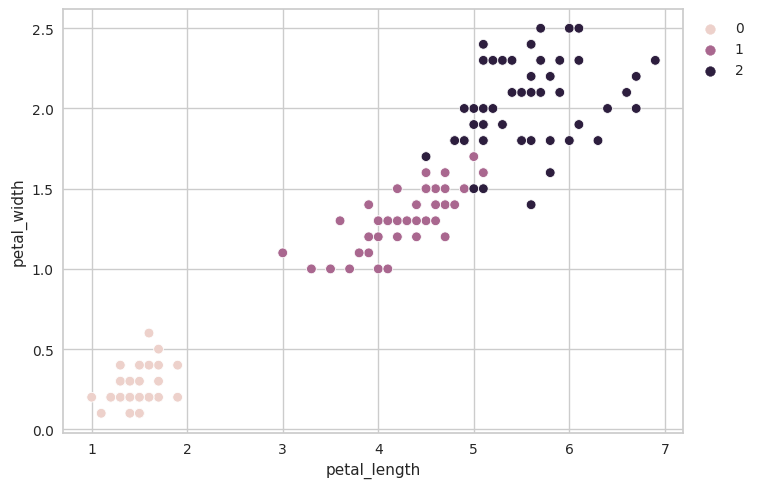

In [38]:
sns.scatterplot(x='petal_length', y='petal_width',
                hue='species', data=data, )

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

From the above plot, we can infer that –

* Species Setosa has smaller petal lengths and widths.
* Versicolor Species lies in the middle of the other two species in terms of petal length and width.
* Species Virginica has the largest of petal lengths and widths.

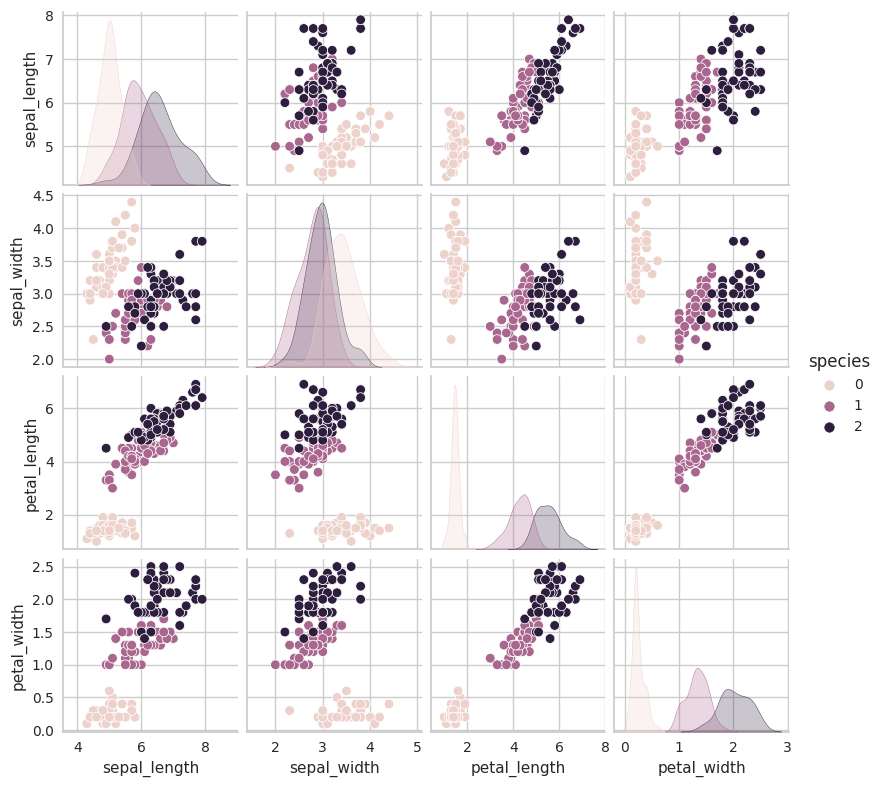

In [39]:
sns.pairplot(data,
             hue='species', height=2)

We can see many types of relationships from this plot such as the species Setosa has the smallest of petals widths and lengths. It also has the smallest sepal length but larger sepal widths. Such information can be gathered about any other species.

**Histograms**

Histograms allow seeing the distribution of data for various columns. It can be used for uni as well as bi-variate analysis.

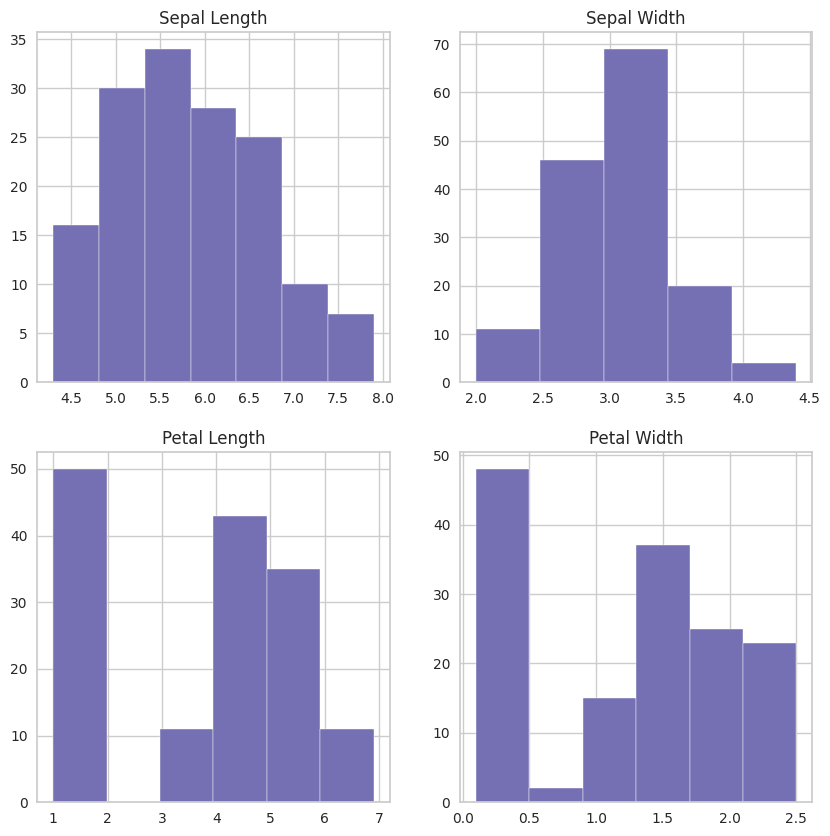

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(data['sepal_length'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(data['sepal_width'], bins=5);

axes[1,0].set_title("Petal Length")
axes[1,0].hist(data['petal_length'], bins=6);

axes[1,1].set_title("Petal Width")
axes[1,1].hist(data['petal_width'], bins=6);

From the above plot, we can see that –

* The highest frequency of the sepal length is between 30 and 35 which is between 5.5 and 6
* The highest frequency of the sepal Width is around 70 which is between 3.0 and 3.5
* The highest frequency of the petal length is around 50 which is between 1 and 2
* The highest frequency of the petal width is between 40 and 50 which is between 0.0 and 0.5

**Histograms with Distplot Plot**

Distplot is used basically for the univariant set of observations and visualizes it through a histogram i.e. only one observation and hence we choose one particular column of the dataset.

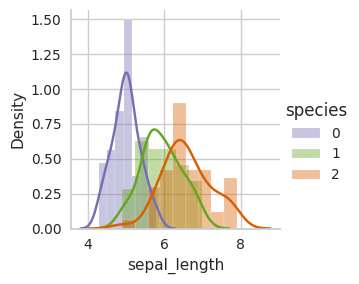

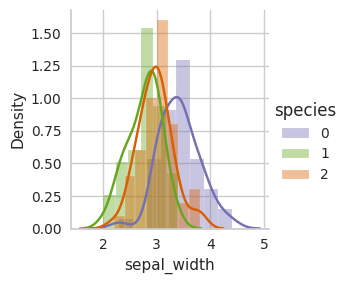

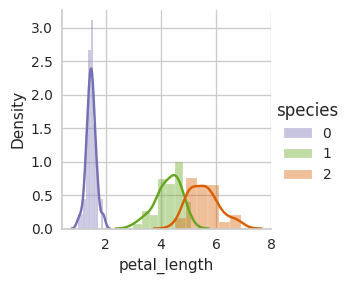

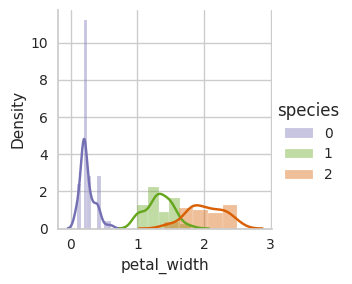

In [41]:
plot = sns.FacetGrid(data, hue="species")
plot.map(sns.distplot, "sepal_length").add_legend()

plot = sns.FacetGrid(data, hue="species")
plot.map(sns.distplot, "sepal_width").add_legend()

plot = sns.FacetGrid(data, hue="species")
plot.map(sns.distplot, "petal_length").add_legend()

plot = sns.FacetGrid(data, hue="species")
plot.map(sns.distplot, "petal_width").add_legend()

plt.show()

From the above plots, we can see that –

* In the case of Sepal Length, there is a huge amount of overlapping.
* In the case of Sepal Width also, there is a huge amount of overlapping.
* In the case of Petal Length, there is a very little amount of overlapping.
* In the case of Petal Width also, there is a very little amount of overlapping.

So we can use Petal Length and Petal Width as the classification feature.

**Handling Correlation**

Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. Any NA values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.

In [42]:
data.corr(method = 'pearson')

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


**Heatmap**

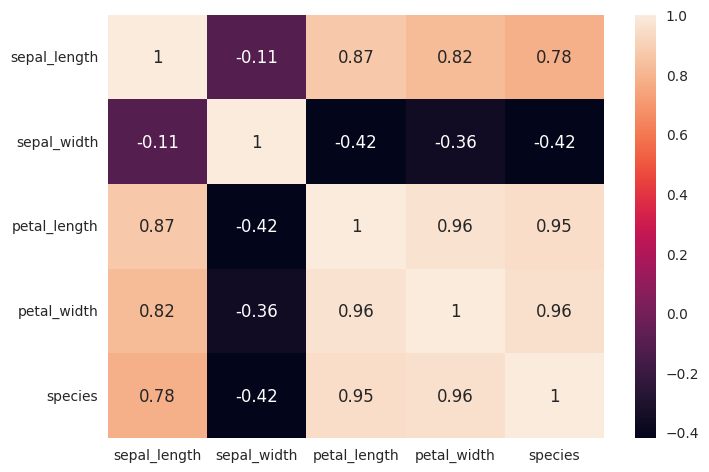

In [43]:
sns.heatmap(data.corr(method = 'pearson'),annot = True)

plt.show()

From the above graph, we can see that –

* Petal width and petal length have high correlations.
* Petal length and sepal width have good correlations.
* Petal Width and Sepal length have good correlations.

**Box Plots**

We can use boxplots to see how the categorical value os distributed with other numerical values

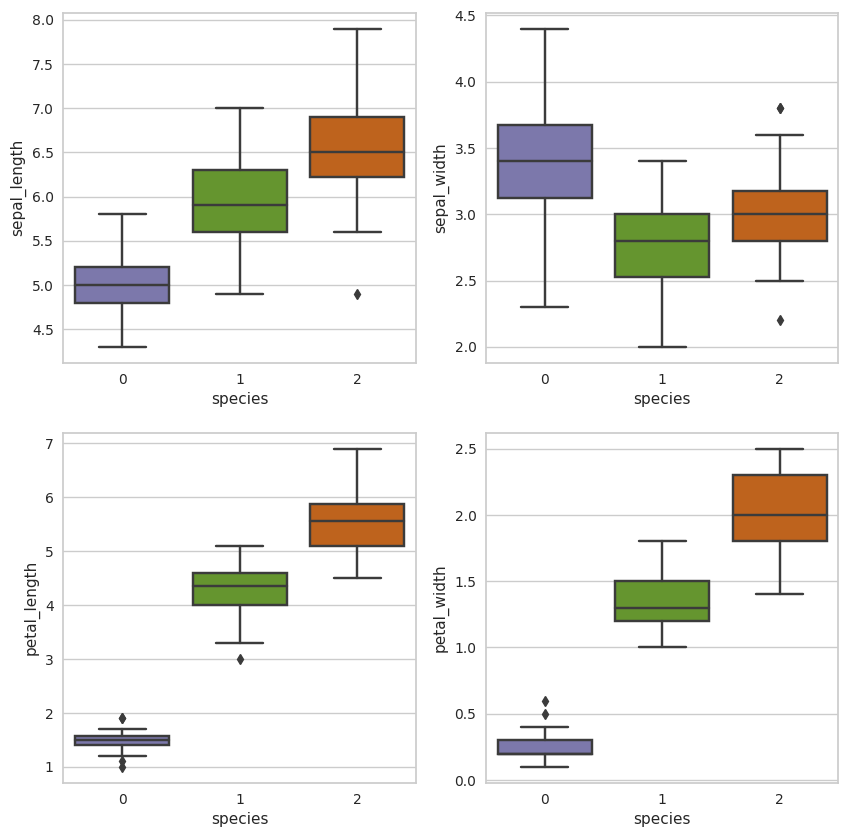

In [44]:
def graph(y):
    sns.boxplot(x="species", y=y, data=data)

plt.figure(figsize=(10,10))

# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('sepal_length')

plt.subplot(222)
graph('sepal_width')

plt.subplot(223)
graph('petal_length')

plt.subplot(224)
graph('petal_width')

plt.show()

From the above graph, we can see that –

* Species Setosa has the smallest features and less distributed with some outliers.
* Species Versicolor has the average features.
* Species Virginica has the highest features

**Handling Outliers**

An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s dataframe.

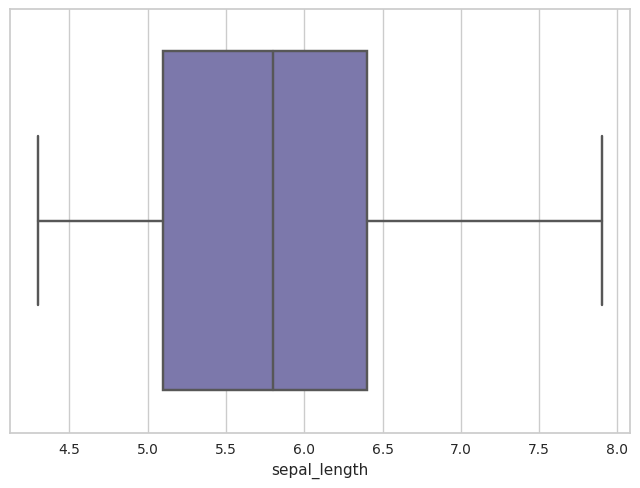

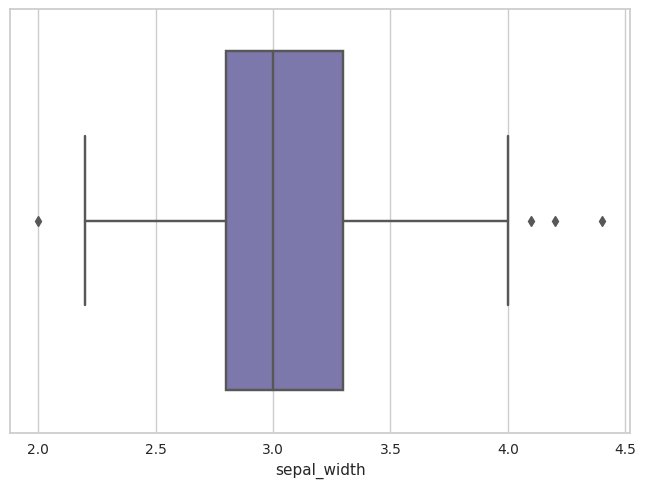

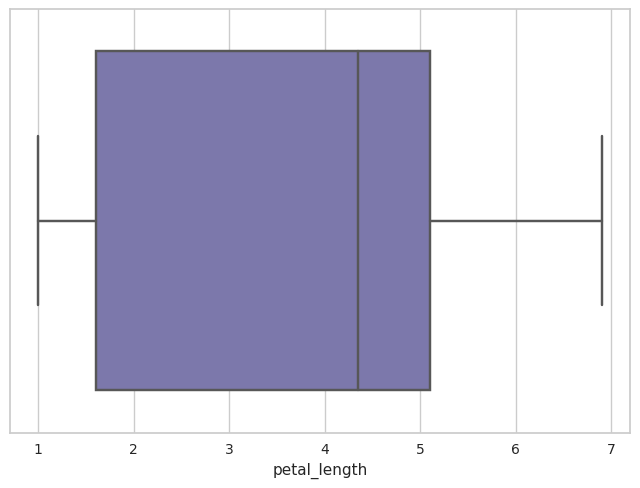

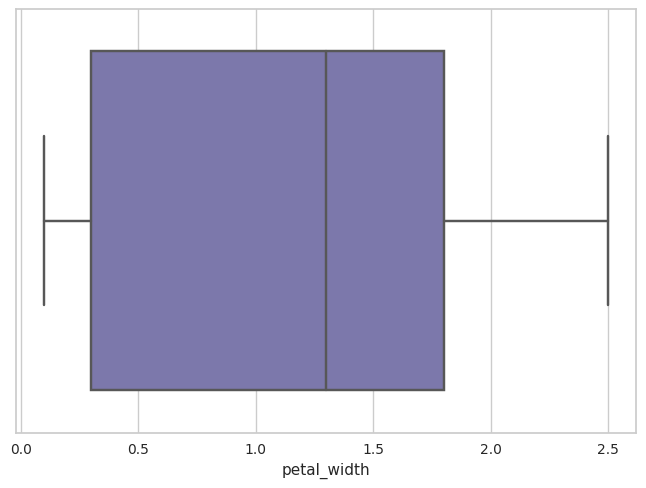

In [45]:
columnlist = ["sepal_length","sepal_width","petal_length","petal_width"]
for col in columnlist:
    sns.boxplot(x=data[col])
    plt.xlabel(col)
    plt.show()

In the above graph of sepal_width, the values above 4 and below 2 are acting as outliers.

**Removing Outliers**

For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

0.5
Old Shape:  (150, 5)
New Shape:  (146, 5)


<Axes: xlabel='sepal_width'>

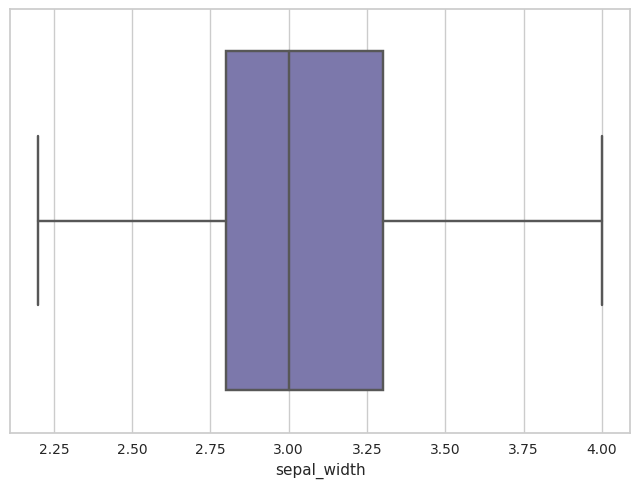

In [46]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/DIGICHROME/iris.csv')

# IQR
Q1 = np.percentile(data['sepal_width'], 25,
                interpolation = 'midpoint')

Q3 = np.percentile(data['sepal_width'], 75,
                interpolation = 'midpoint')
IQR = Q3 - Q1

print(IQR)

print("Old Shape: ", data.shape)

# Upper bound
upper = np.where(data['sepal_width'] >= (Q3+1.5*IQR))

# Lower bound
lower = np.where(data['sepal_width'] <= (Q1-1.5*IQR))

# Removing the Outliers
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)

print("New Shape: ", data.shape)

sns.boxplot(x='sepal_width', data=data)

In [47]:
pip install plotly

In [48]:
import plotly.express as px

# using the iris dataset
data = px.data.iris()

# plotting the line chart
fig = px.line(data, y="sepal_width",)

# showing the plot
fig.show()

In the above example, we can see that –

* The labels to the x-axis and y-axis have given automatically by plotly.
* The data of the x-axis and y-axis is shown on hover.
* We can also select a part of the data according to our needs and can also zoom out.
* Plotly also provides a set of tools (seen on the top right corner) to interact with every chart.
* Plotly also allows us to save the graph locally in a static format.

In [49]:
data = data.drop('species_id', axis = 1)


In [50]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

**Label Encoding**

In [51]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le = LabelEncoder()
y = le.fit_transform(y)

In [61]:

data['species'] = LabelEncoder().fit_transform(data['species'])

In [62]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [63]:
index = [0,1,2]
classes = ['setosa','versicolor','virginica']
pd.DataFrame({'Label': index, 'Target': classes}, columns = ['Label', 'Target'])

,Label,Target
0,0,setosa
1,1,versicolor
2,2,virginica


* As can be seen, now 'Iris-setosa' assigned as 0, 'Iris-versicolor' assigned as 1, and so on.

> Indented block



**Splitting the Dataset**

👉 The dataset will be splitted into 80:20 ratio (80% training and 20% testing).


👉 In addition, dataset splitting will also using stratified random sampling method.

Stratified random sampling is a method of sampling that involves the division of a population into smaller sub-groups known as strata. In stratified random sampling the strata are formed based on members' shared attributes or characteristics.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 0)

In [65]:
print('Train Test Info')
print('>> Train Set')
print(': Total data in train set:', X_train.shape[0])
print(': Total target data in train set:', y_train.shape[0])
print(': Total column in train set:', X_train.shape[1])
print('>> Test Set')
print(': Total data in test set:', X_test.shape[0])
print(': Total target data in test set:', y_test.shape[0])
print(': Total column in test set:', X_test.shape[1])

Train Test Info
>> Train Set
: Total data in train set: 120
: Total target data in train set: 120
: Total column in train set: 4
>> Test Set
: Total data in test set: 30
: Total target data in test set: 30
: Total column in test set: 4


**Logistic Regression**

In [69]:
LRclassifier = LogisticRegression(solver='liblinear')
LRclassifier.fit(X_train, y_train)

y_pred_LR = LRclassifier.predict(X_test)

In [89]:
LRAcc = accuracy_score(y_pred_LR, y_test)
print('Logistic Regression Accuracy:',format(LRAcc*100))

Logistic Regression Accuracy: 96.66666666666667


In [73]:
# --- LR Classification Report ---
print(' Classification Report')
print('*' * 25)
print(classification_report(y_test, y_pred_LR))

 Classification Report
*************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

